In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import scipy
import qiskit
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import (
    CU3Gate,
    U3Gate,
    HGate,
    IGate,
    SGate,
    SdgGate,
    TGate,
    TdgGate,
    XGate,
    YGate,
    ZGate,
    CXGate,
    CZGate,
    CYGate,
    CHGate,
    SXGate,
    RXGate,
    RYGate,
    RZGate,
    CRXGate,
    CRYGate,
    CRZGate
)
from cmab_qas.search import searchParameterized, single_circuit_training
from cmab_qas.standard_ops import GatePool
from cmab_qas.circuits import (
    BitFlipSearchDensityMatrixNoiseless,
    SIMPLE_DATASET_BIT_FLIP,
    PhaseFlipDensityMatrixNoiseless,
    SIMPLE_DATASET_PHASE_FLIP,
    FourTwoTwoDetectionDensityMatrixNoiseless,
    FOUR_TWO_TWO_DETECTION_CODE_DATA,
    FiveBitCodeSearchDensityMatrixNoiseless,
    SIMPLE_DATASET_FIVE_BIT_CODE,
    TOFFOLI_DATA,
    ToffoliCircuitDensityMatrixNoiseless
)
import json
import numpy as np
import optax
import jax.numpy as jnp
import jax
import time
import random
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
output_notebook()

Loading BokehJS ...

Searching for the decomposition of Toffoli gate...

dict_keys(['task', 'pool', 'params', 'k', 'ops', 'reward_list', 'final_training_res'])
dict_keys(['params', 'loss_list', 'ops'])
['(U3Gate, [1], [-0.021309476, 1.0961204, 1.5089153])',
 '(U3Gate, [0], [0.0026685891, -0.926837, -0.6166534])',
 '(CU3Gate, [0, 2], [-0.038590085, 1.9090353, 0.35554376])',
 '(U3Gate, [2], [0.06254779, -1.3501221, -0.049706593])',
 '(CU3Gate, [1, 2], [1.6995894, -1.1277974, -0.80524325])',
 '(U3Gate, [1], [0.018838223, 1.4080541, 0.01555068])',
 '(CU3Gate, [0, 2], [-0.16378883, 1.2971971, 1.8483301])',
 '(CU3Gate, [1, 2], [0.6378424, 0.2477402, -1.5902767])',
 '(U3Gate, [2], [0.20444088, -0.8125224, 0.12454643])',
 '(U3Gate, [0], [-0.006499107, 0.50002885, 0.64725566])',
 '(CU3Gate, [1, 2], [1.0525801, -0.45562118, 0.06404788])',
 '(U3Gate, [2], [-0.20476134, -0.3900011, 1.1755519])',
 '(U3Gate, [1], [-0.002860015, 0.2829019, -0.64475715])']
Final Search Iteration Reward: [[1, 0, 4, 2, 5, 1, 4, 5, 2, 0, 5, 2, 1], 0.9548784590670569]


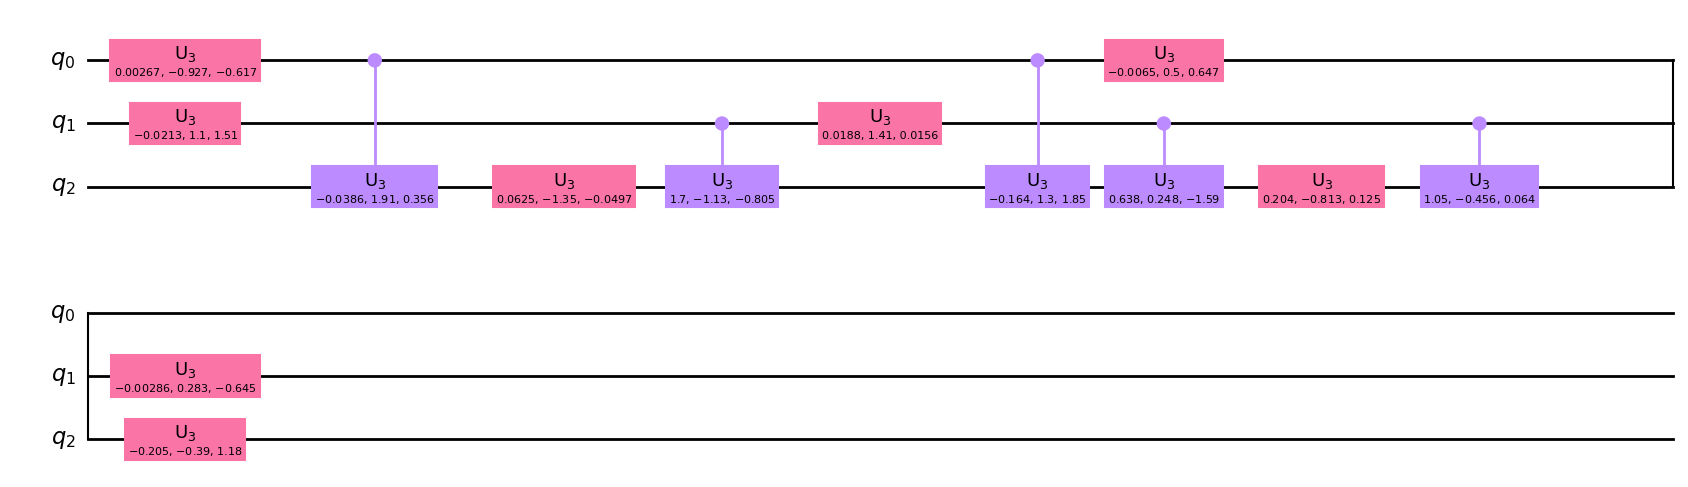

In [8]:
res_filename = "20210902-155813.json"
with open(res_filename, 'r') as f:
    res = json.load(f)
print(res.keys())
print(res['final_training_res'].keys())
pprint(res['ops'])
print("Final Search Iteration Reward: {}".format(res['reward_list'][-1]))
qc = qiskit.QuantumCircuit(3)
for c in res['ops']:
    c = eval(c)
    gate_obj = c[0](*c[2])
    qc.append(gate_obj, c[1])
qc.draw(output = 'mpl');

In [9]:
num_search_epochs = len(res['reward_list'])
search_reward_plot = figure(plot_width=700, plot_height=500, title="Search Reward Plot, Toffoli Decomposition, No Noise")
search_reward_plot.line(list(range(num_search_epochs)), [c[1] for c in res['reward_list']], line_width=1.5)
search_reward_plot.xaxis.axis_label = 'Epoch'
search_reward_plot.yaxis.axis_label = "Reward"
show(search_reward_plot)

In [10]:
num_finetune_epochs = len(res['final_training_res']['loss_list'])
finetune_loss_plot = figure(plot_width=700, plot_height=500, title="Fine Tune Loss Plot, Toffoli Decomposition, No Noise")
finetune_loss_plot.line(list(range(num_finetune_epochs)), res['final_training_res']['loss_list'], line_width=1.5)
finetune_loss_plot.xaxis.axis_label = 'Epoch'
finetune_loss_plot.yaxis.axis_label = "Loss"
show(finetune_loss_plot)

{"0": {"U3Gate": [0]}, "1": {"U3Gate": [1]}, "2": {"U3Gate": [2]}, "3": {"CU3Gate": [0, 1]}, "4": {"CU3Gate": [0, 2]}, "5": {"CU3Gate": [1, 2]}}
Final fine-tune iteration loss: 0.0003494221487885252
['(U3Gate, [1], [-0.02130947634577751, 1.0961203575134277, '
 '1.5089153051376343])',
 '(U3Gate, [0], [0.0026685891207307577, -0.9268370270729065, '
 '-0.6166533827781677])',
 '(CU3Gate, [0, 2], [-0.03859008476138115, 1.909035325050354, '
 '0.35554376244544983])',
 '(U3Gate, [2], [0.06254778802394867, -1.350122094154358, '
 '-0.0497065931558609])',
 '(CU3Gate, [1, 2], [1.6995893716812134, -1.1277973651885986, '
 '-0.8052432537078857])',
 '(U3Gate, [1], [0.018838223069906235, 1.4080541133880615, '
 '0.015550680458545685])',
 '(CU3Gate, [0, 2], [-0.1637888252735138, 1.2971971035003662, '
 '1.8483301401138306])',
 '(CU3Gate, [1, 2], [0.6378424167633057, 0.24774019420146942, '
 '-1.5902767181396484])',
 '(U3Gate, [2], [0.2044408768415451, -0.8125224113464355, '
 '0.12454643100500107])',
 '(U3Ga

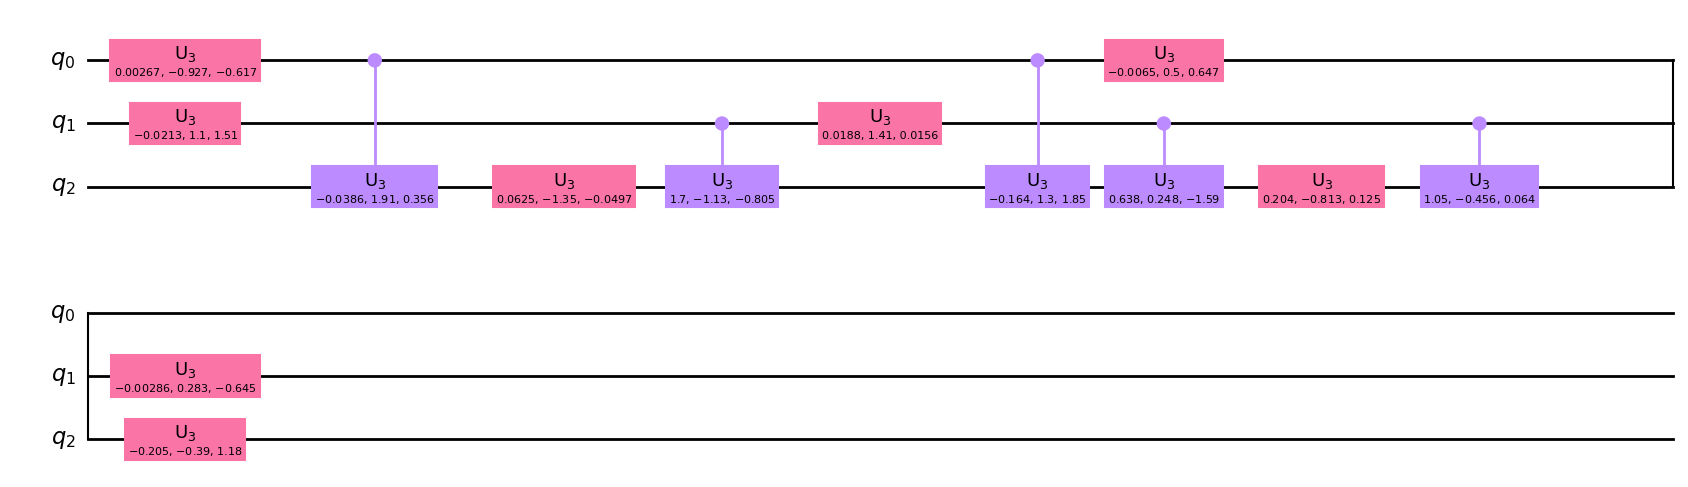

In [13]:
model = ToffoliCircuitDensityMatrixNoiseless
data = TOFFOLI_DATA
init_qubit_with_actions = {0,1,2}
d_np = ["CU3Gate"]
s_np = ["U3Gate"]
cu3_map = [(0,1), (0,2), (1,2)]
pool = GatePool(3, s_np, d_np, complete_undirected_graph=False, two_qubit_gate_map=cu3_map)
print(pool)
l = 3
c = len(pool)
p = 13
final_param = np.array(res['final_training_res']['params'])
final_ops = model(p,c,l,res['k'],pool).get_circuit_ops(final_param)
print("Final fine-tune iteration loss: {}".format(res['final_training_res']['loss_list'][-1]))
pprint(final_ops)
qc2 = qiskit.QuantumCircuit(3)
for c in final_ops:
    c = eval(c)
    gate_obj = c[0](*c[2])
    qc2.append(gate_obj, c[1])
qc2.draw(output = 'mpl');

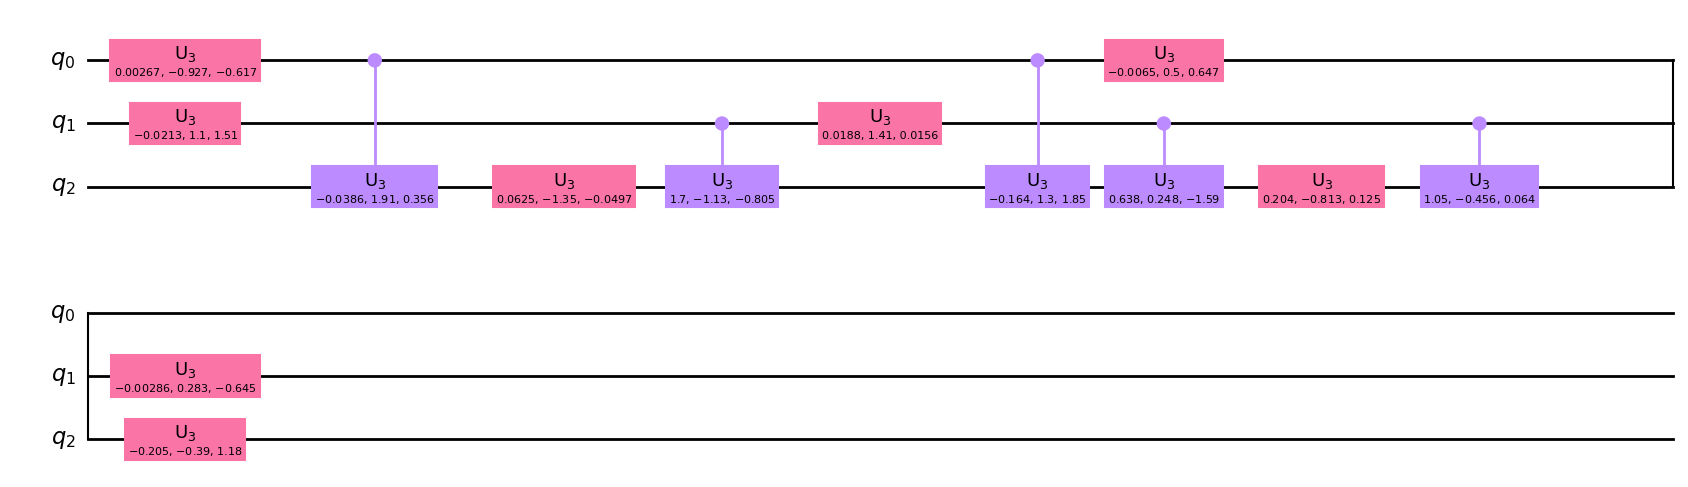

In [12]:
qc.draw(output = 'mpl');

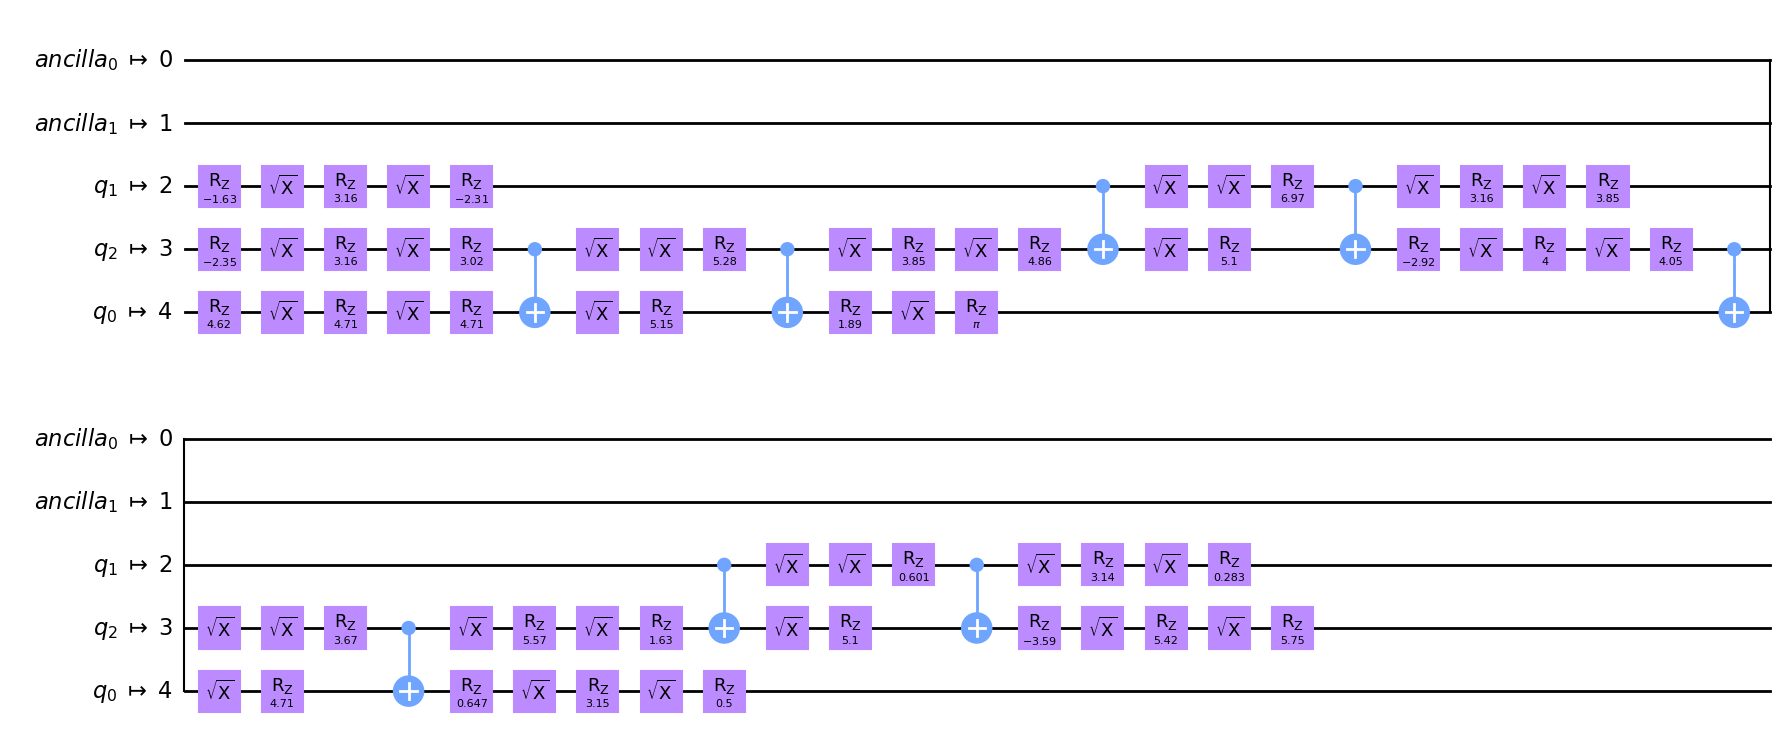

In [19]:
from qiskit.test.mock import FakeSantiago
from qiskit.providers.aer import AerSimulator
import qiskit
simulator = AerSimulator.from_backend(FakeSantiago())
qc3 = qiskit.transpile(qc2, simulator, optimization_level=3)
qc3.draw('mpl');

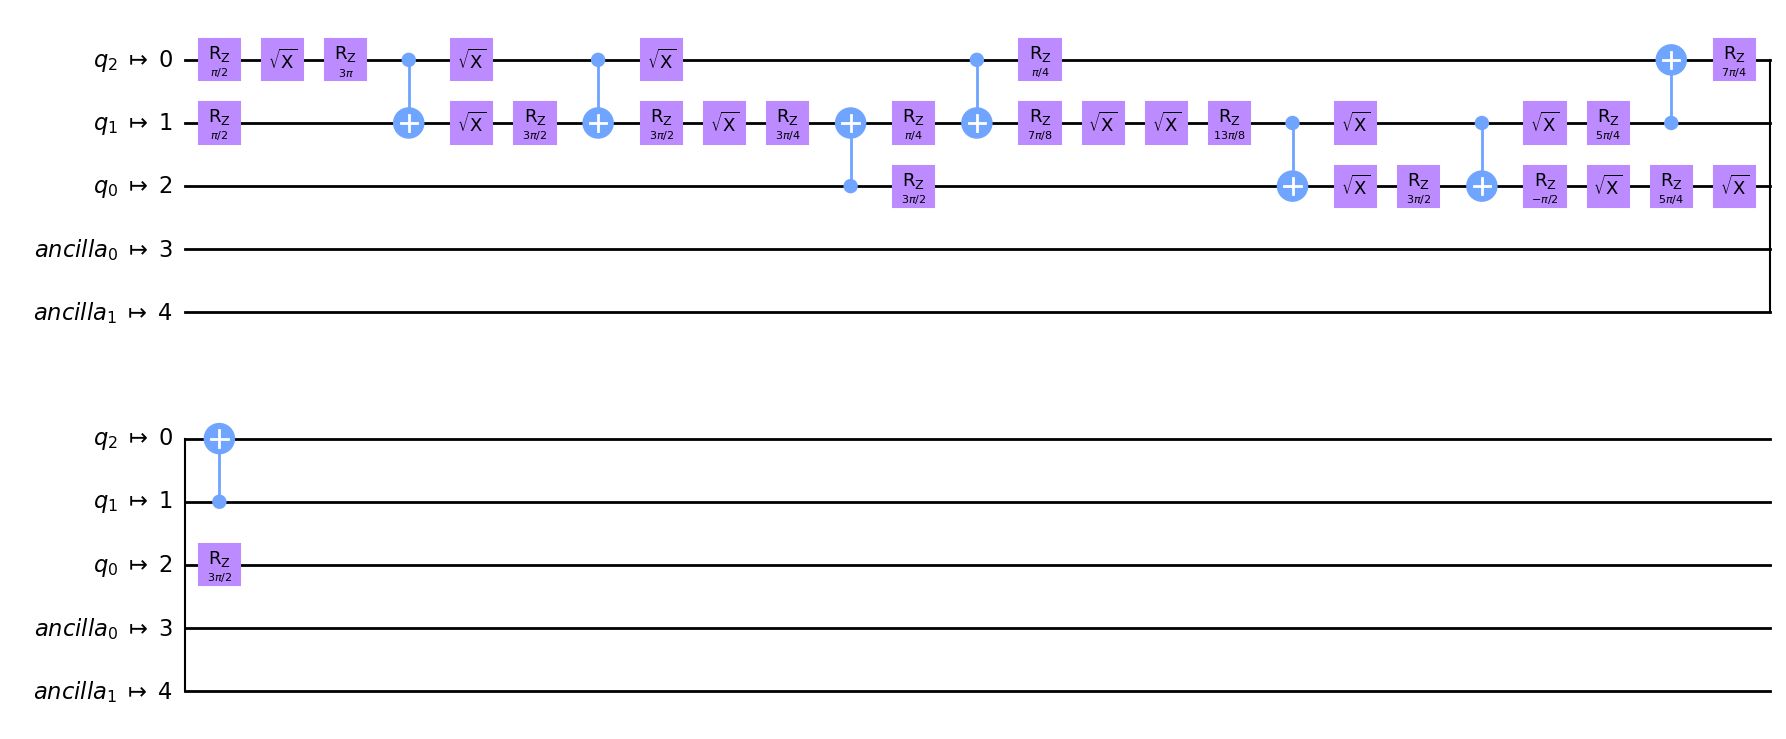

In [20]:
qc4 = QuantumCircuit(3)
qc4.ccx(0,1,2)
qc4 = qiskit.transpile(qc4, simulator, optimization_level=3)
qc4.draw('mpl');